## Train Model

In [1]:
import os
import logging
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

from SimpleWalk2D import SimpleWalk2DDynGoal

env = SimpleWalk2DDynGoal()

### Train Callback

In [2]:
class TrainAndLoggingCallback(BaseCallback):
    
    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path
        
    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok = True)
            
    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)
            
        return True

In [3]:
env_name = 'SW2DDynGoal'

CHECKPOINT_DIR = './train/train_' + env_name
LOG_DIR = './train/log_' + env_name

callback = TrainAndLoggingCallback(check_freq=10_000, save_path=CHECKPOINT_DIR)

log_path = os.path.join('Training', 'Logs')

model = PPO(
    "MlpPolicy", 
    env, 
    verbose=0, 
    tensorboard_log=log_path,
    #learning_rate=0.0001,
    #n_steps =2048
    )
logger.setLevel(logging.INFO)

model.learn(
    total_timesteps=300_000, 
    callback = callback
    )

model.save('PPO')

logger.setLevel(logging.DEBUG)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to Training/Logs/PPO_39
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 17.4      |
|    ep_rew_mean     | -2.85e+03 |
| time/              |           |
|    fps             | 862       |
|    iterations      | 1         |
|    time_elapsed    | 2         |
|    total_timesteps | 2048      |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 16.6         |
|    ep_rew_mean          | -2.6e+03     |
| time/                   |              |
|    fps                  | 793          |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0036946998 |
|    clip_fraction        | 0.0181       |
|    cl

## Test Model

In [4]:
from stable_baselines3 import PPO
from SimpleWalk2D import SimpleWalk2DDynGoal

env = SimpleWalk2DDynGoal()

model = PPO.load("PPO", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


DEBUG:root:
DEBUG:root:reset
DEBUG:root:movement: 1.3623638153076172
DEBUG:root:movement: 1.7122468948364258
DEBUG:root:vector 1: [1. 1.]
DEBUG:root:vector 2: [1. 1.]
DEBUG:root:angle: 0.0003452669847162036
DEBUG:root:movement: 1.7103595733642578
DEBUG:root:vector 1: [1. 1.]
DEBUG:root:vector 2: [0.9999995 1.       ]
DEBUG:root:angle: 0.0
DEBUG:root:movement: 1.7060322761535645
DEBUG:root:vector 1: [0.9999995 1.       ]
DEBUG:root:vector 2: [1. 1.]
DEBUG:root:angle: 0.0
DEBUG:root:movement: 1.6919503211975098
DEBUG:root:vector 1: [1. 1.]
DEBUG:root:vector 2: [1.        1.0000005]
DEBUG:root:angle: 0.0
DEBUG:root:movement: 1.586236596107483
DEBUG:root:vector 1: [1.        1.0000005]
DEBUG:root:vector 2: [1.         0.84972954]
DEBUG:root:angle: 0.0810614353738023
DEBUG:root:reached goal
DEBUG:root:x: [5.327431, 6.327431, 7.327431, 8.327431, 9.327431, 10.327431, 11.327431, 11.787768]
DEBUG:root:y: [3.6963286, 4.6963286, 5.6963286, 6.6963286, 7.6963286, 8.696329, 9.546059, 9.45209]
DEBUG:

done
info {'distance_to_goal': 0.6895641, 'steps_taken': 7, 'previous_state': array([11.787768,  9.45209 , 11.552775,  9.644386, 12.016949,  9.538081],
      dtype=float32), 'new_state': array([11.787768,  9.45209 , 11.552775,  9.644386, 12.016949,  9.538081],
      dtype=float32)}


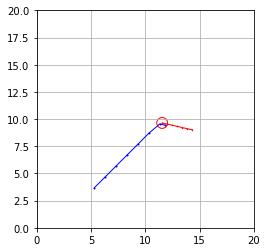

DEBUG:root:
DEBUG:root:reset
DEBUG:root:movement: 1.0733003616333008
DEBUG:root:movement: 1.5387601852416992
DEBUG:root:vector 1: [0.3909521 1.       ]
DEBUG:root:vector 2: [0.51855946 1.        ]
DEBUG:root:angle: 0.10570259152515331
DEBUG:root:movement: 1.429945945739746
DEBUG:root:vector 1: [0.51855946 1.        ]
DEBUG:root:vector 2: [0.18416786 1.        ]
DEBUG:root:angle: 0.29625763894254914
DEBUG:root:movement: 1.4713926315307617
DEBUG:root:vector 1: [0.18416786 1.        ]
DEBUG:root:vector 2: [0.3675537 1.       ]
DEBUG:root:angle: 0.17009880185085713
DEBUG:root:movement: 1.360069990158081
DEBUG:root:vector 1: [0.3675537 1.       ]
DEBUG:root:vector 2: [-0.0791111  1.       ]
DEBUG:root:angle: 0.43117347744172685
DEBUG:root:movement: 1.3953077793121338
DEBUG:root:vector 1: [-0.0791111  1.       ]
DEBUG:root:vector 2: [0.07996845 1.        ]
DEBUG:root:angle: 0.158746447673789
DEBUG:root:movement: 1.3740414381027222
DEBUG:root:vector 1: [0.07996845 1.        ]
DEBUG:root:vecto

done
info {'distance_to_goal': 1.0014898, 'steps_taken': 8, 'previous_state': array([14.400573, 14.594433, 14.501666, 14.496433, 14.838579, 14.832954],
      dtype=float32), 'new_state': array([14.400573, 14.594433, 14.501666, 14.496433, 14.838579, 14.832954],
      dtype=float32)}


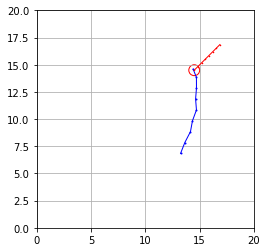

DEBUG:root:
DEBUG:root:reset
DEBUG:root:movement: 1.0787591934204102
DEBUG:root:movement: 1.315460205078125
DEBUG:root:vector 1: [-1. -1.]
DEBUG:root:vector 2: [-0.508831 -1.      ]
DEBUG:root:angle: 0.3147109491276611
DEBUG:root:movement: 1.302250862121582
DEBUG:root:vector 1: [-0.508831 -1.      ]
DEBUG:root:vector 2: [-0.24148178 -1.        ]
DEBUG:root:angle: 0.23374214892243333
DEBUG:root:movement: 1.3220291137695312
DEBUG:root:vector 1: [-0.24148178 -1.        ]
DEBUG:root:vector 2: [-0.63820744 -1.        ]
DEBUG:root:angle: 0.33109467309837864
DEBUG:root:movement: 1.317366600036621
DEBUG:root:vector 1: [-0.63820744 -1.        ]
DEBUG:root:vector 2: [-0.7261915 -1.       ]
DEBUG:root:angle: 0.060046769515874274
DEBUG:root:movement: 1.3094286918640137
DEBUG:root:vector 1: [-0.7261915 -1.       ]
DEBUG:root:vector 2: [-0.2831211 -1.       ]
DEBUG:root:angle: 0.3521881577167279
DEBUG:root:movement: 1.2989068031311035
DEBUG:root:vector 1: [-0.2831211 -1.       ]
DEBUG:root:vector 2:

done
info {'distance_to_goal': 0.6706851, 'steps_taken': 12, 'previous_state': array([12.443424 ,  7.6853743, 12.482807 ,  7.870371 , 12.84425  ,
        7.5603437], dtype=float32), 'new_state': array([12.443424 ,  7.6853743, 12.482807 ,  7.870371 , 12.84425  ,
        7.5603437], dtype=float32)}


DEBUG:root:y: [19.229372, 18.229372, 17.229372, 16.229372, 15.229372, 14.229372, 13.229372, 12.229372, 11.229372, 10.229372, 9.229372, 8.229372, 7.6853743]
DEBUG:root:goal: [12.482807  7.870371]


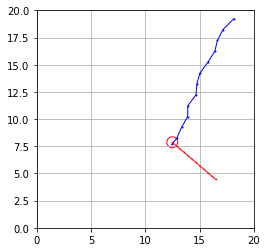

DEBUG:root:
DEBUG:root:reset
DEBUG:root:movement: 1.038336992263794
DEBUG:root:movement: 0.8305044174194336
DEBUG:root:vector 1: [ 1.         -0.48195076]
DEBUG:root:vector 2: [ 1.         -0.07218933]
DEBUG:root:angle: 0.3770401649899503
DEBUG:root:movement: 0.9333367347717285
DEBUG:root:vector 1: [ 1.         -0.07218933]
DEBUG:root:vector 2: [ 1.       -0.872612]
DEBUG:root:angle: 0.6454116676720544
DEBUG:root:reached goal
DEBUG:root:x: [5.13478, 6.13478, 7.13478, 8.13478, 9.13478]
DEBUG:root:y: [14.435231, 13.95328, 13.881091, 13.008479, 12.507185]
DEBUG:root:goal: [ 9.360947 12.498828]


done
info {'distance_to_goal': 1.1092343, 'steps_taken': 4, 'previous_state': array([ 9.13478 , 12.507185,  9.360947, 12.498828,  9.242962, 12.960171],
      dtype=float32), 'new_state': array([ 9.13478 , 12.507185,  9.360947, 12.498828,  9.242962, 12.960171],
      dtype=float32)}


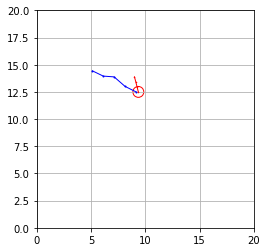

DEBUG:root:
DEBUG:root:reset
DEBUG:root:movement: 1.0391039848327637
DEBUG:root:movement: 0.7370145320892334
DEBUG:root:vector 1: [-0.5083761   0.99999994]
DEBUG:root:vector 2: [-0.40198898  1.        ]
DEBUG:root:angle: 0.08810541793351659
DEBUG:root:movement: 0.7415616512298584
DEBUG:root:vector 1: [-0.40198898  1.        ]
DEBUG:root:vector 2: [-0.53294754  1.        ]
DEBUG:root:angle: 0.10743579977904391
DEBUG:root:movement: 0.7230792045593262
DEBUG:root:vector 1: [-0.53294754  1.        ]
DEBUG:root:vector 2: [-0.7200928  1.0000002]
DEBUG:root:angle: 0.13442646726476654
DEBUG:root:movement: 0.7522658109664917
DEBUG:root:vector 1: [-0.7200928  1.0000002]
DEBUG:root:vector 2: [-0.1053648  1.       ]
DEBUG:root:angle: 0.5191064359348966
DEBUG:root:movement: 0.7369166612625122
DEBUG:root:vector 1: [-0.1053648  1.       ]
DEBUG:root:vector 2: [-0.38004208  1.        ]
DEBUG:root:angle: 0.2582060006064664
DEBUG:root:movement: 0.3933454155921936
DEBUG:root:vector 1: [-0.38004208  1.    

done
info {'distance_to_goal': 0.59621376, 'steps_taken': 8, 'previous_state': array([12.631768 ,  8.373278 , 12.693778 ,  8.220475 , 13.091101 ,
        7.9580016], dtype=float32), 'new_state': array([12.631768 ,  8.373278 , 12.693778 ,  8.220475 , 13.091101 ,
        7.9580016], dtype=float32)}


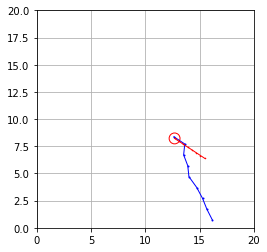

DEBUG:root:
DEBUG:root:reset
DEBUG:root:movement: 1.4141135215759277
DEBUG:root:movement: 1.7584755420684814
DEBUG:root:vector 1: [1. 1.]
DEBUG:root:vector 2: [1. 1.]
DEBUG:root:angle: 0.0003452669847162036
DEBUG:root:movement: 1.6997454166412354
DEBUG:root:vector 1: [1. 1.]
DEBUG:root:vector 2: [1. 1.]
DEBUG:root:angle: 0.0003452669847162036
DEBUG:root:movement: 1.303100347518921
DEBUG:root:vector 1: [1. 1.]
DEBUG:root:vector 2: [1.         0.45270634]
DEBUG:root:angle: 0.36029584161412953
DEBUG:root:reached goal
DEBUG:root:x: [5.293809, 6.293809, 7.293809, 8.293809, 9.293809, 10.036699]
DEBUG:root:y: [10.616306, 11.616306, 12.616306, 13.616306, 14.069013, 14.024999]
DEBUG:root:goal: [10.169749 13.781496]


done
info {'distance_to_goal': 0.91681737, 'steps_taken': 5, 'previous_state': array([10.036699, 14.024999, 10.169749, 13.781496, 10.191103, 14.257208],
      dtype=float32), 'new_state': array([10.036699, 14.024999, 10.169749, 13.781496, 10.191103, 14.257208],
      dtype=float32)}


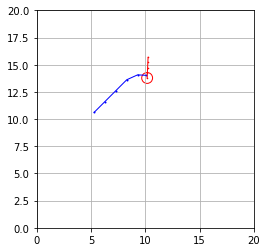

DEBUG:root:
DEBUG:root:reset
DEBUG:root:movement: 1.401320457458496
DEBUG:root:movement: 1.5840363502502441
DEBUG:root:vector 1: [-1.         1.0000005]
DEBUG:root:vector 2: [-1.  1.]
DEBUG:root:angle: 0.0
DEBUG:root:movement: 1.4680957794189453
DEBUG:root:vector 1: [-1.  1.]
DEBUG:root:vector 2: [-1.         0.9363785]
DEBUG:root:angle: 0.032843608434212815
DEBUG:root:movement: 1.2946457862854004
DEBUG:root:vector 1: [-1.         0.9363785]
DEBUG:root:vector 2: [-1.          0.87609863]
DEBUG:root:angle: 0.03310395541054865
DEBUG:root:movement: 1.0006036758422852
DEBUG:root:vector 1: [-1.          0.87609863]
DEBUG:root:vector 2: [-1.         0.1620636]
DEBUG:root:angle: 0.5587853797865459
DEBUG:root:movement: 0.9215350151062012
DEBUG:root:vector 1: [-1.         0.1620636]
DEBUG:root:vector 2: [-1.        -0.3777027]
DEBUG:root:angle: 0.5218047797046228
DEBUG:root:movement: 0.9223983287811279
DEBUG:root:vector 1: [-1.        -0.3777027]
DEBUG:root:vector 2: [-1.         -0.29002953]
D

done
info {'distance_to_goal': 1.3482797, 'steps_taken': 8, 'previous_state': array([10.508467, 10.443314, 10.07772 , 10.440818, 10.1604  , 10.909776],
      dtype=float32), 'new_state': array([10.508467, 10.443314, 10.07772 , 10.440818, 10.1604  , 10.909776],
      dtype=float32)}


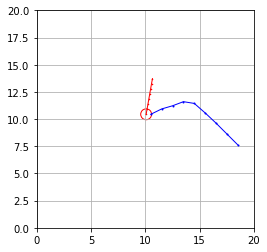

DEBUG:root:
DEBUG:root:reset
DEBUG:root:movement: 1.3989934921264648
DEBUG:root:movement: 1.7771391868591309
DEBUG:root:vector 1: [1. 1.]
DEBUG:root:vector 2: [1. 1.]
DEBUG:root:angle: 0.0003452669847162036
DEBUG:root:movement: 1.7041358947753906
DEBUG:root:vector 1: [1. 1.]
DEBUG:root:vector 2: [1. 1.]
DEBUG:root:angle: 0.0003452669847162036
DEBUG:root:movement: 1.3998255729675293
DEBUG:root:vector 1: [1. 1.]
DEBUG:root:vector 2: [0.44351006 1.        ]
DEBUG:root:angle: 0.36795423029556024
DEBUG:root:movement: 1.2676054239273071
DEBUG:root:vector 1: [0.44351006 1.        ]
DEBUG:root:vector 2: [0.32588863 0.9999995 ]
DEBUG:root:angle: 0.10240810723956383
DEBUG:root:reached goal
DEBUG:root:x: [6.604699, 7.604699, 8.604699, 9.604699, 10.048209, 10.374098, 9.641007]


done
info {'distance_to_goal': 1.5225204, 'steps_taken': 6, 'previous_state': array([ 9.641007,  9.605679,  9.881001,  9.953246, 10.32421 , 10.127381],
      dtype=float32), 'new_state': array([ 9.641007,  9.605679,  9.881001,  9.953246, 10.32421 , 10.127381],
      dtype=float32)}


DEBUG:root:y: [3.605679, 4.605679, 5.605679, 6.605679, 7.605679, 8.605679, 9.605679]
DEBUG:root:goal: [9.881001 9.953246]


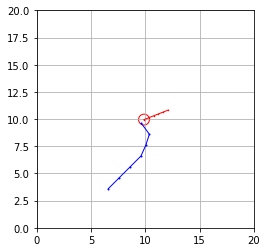

DEBUG:root:
DEBUG:root:reset
DEBUG:root:movement: 1.063823938369751
DEBUG:root:movement: 1.0868425369262695
DEBUG:root:vector 1: [-1.        -0.5544596]
DEBUG:root:vector 2: [-1.         -0.10547733]
DEBUG:root:angle: 0.4011716247576258
DEBUG:root:reached goal
DEBUG:root:x: [10.954525, 9.954525, 8.954525, 7.954525]
DEBUG:root:y: [3.7703757, 3.2159162, 3.1104388, 4.0379915]
DEBUG:root:goal: [7.8875237 3.9925451]


done
info {'distance_to_goal': 1.2992048, 'steps_taken': 3, 'previous_state': array([7.954525 , 4.0379915, 7.8875237, 3.9925451, 7.7295566, 3.5433192],
      dtype=float32), 'new_state': array([7.954525 , 4.0379915, 7.8875237, 3.9925451, 7.7295566, 3.5433192],
      dtype=float32)}


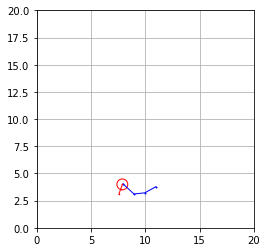

DEBUG:root:
DEBUG:root:reset
DEBUG:root:movement: 1.274001121520996
DEBUG:root:movement: 1.6666388511657715
DEBUG:root:vector 1: [-1. -1.]
DEBUG:root:vector 2: [-1. -1.]
DEBUG:root:angle: 0.0003452669847162036
DEBUG:root:movement: 1.6191625595092773
DEBUG:root:vector 1: [-1. -1.]
DEBUG:root:vector 2: [-1. -1.]
DEBUG:root:angle: 0.0003452669847162036
DEBUG:root:movement: 1.5167768001556396
DEBUG:root:vector 1: [-1. -1.]
DEBUG:root:vector 2: [-1.        -0.6902132]
DEBUG:root:angle: 0.18127107093752384
DEBUG:root:movement: 1.4688913822174072
DEBUG:root:vector 1: [-1.        -0.6902132]
DEBUG:root:vector 2: [-1.        -0.2732172]
DEBUG:root:angle: 0.33741929104693036
DEBUG:root:movement: 1.3800410032272339
DEBUG:root:vector 1: [-1.        -0.2732172]
DEBUG:root:vector 2: [-1.         -0.36612892]
DEBUG:root:angle: 0.08426228668301462
DEBUG:root:reached goal
DEBUG:root:x: [14.603313, 13.603313, 12.603313, 11.603313, 10.603313, 9.603313, 8.603313, 8.039153]
DEBUG:root:y: [14.247604, 13.247

done
info {'distance_to_goal': 0.97252715, 'steps_taken': 7, 'previous_state': array([ 8.039153, 10.416796,  8.196039, 10.266036,  7.724944, 10.335509],
      dtype=float32), 'new_state': array([ 8.039153, 10.416796,  8.196039, 10.266036,  7.724944, 10.335509],
      dtype=float32)}


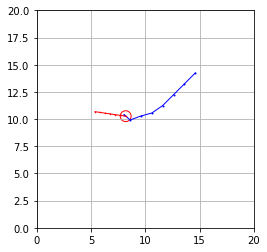

In [5]:

# test prediction
logger.setLevel(logging.DEBUG)

episodes = 10
for episode in range(episodes):
    env.reset()

    while True:
        action, _states = model.predict(env.state)
        obs, rewards, done, info = env.step(action)
        if done:
            print('done')
            print("info", info)
            break
    env.render()

In [6]:
from stable_baselines3.common.evaluation import evaluate_policy

evaluate_policy(model, env, n_eval_episodes=10, render=False)

# TODO render doesn't work

/home/luttkule/anaconda3/envs/rl-test/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
DEBUG:root:
DEBUG:root:reset
DEBUG:root:movement: 1.4127049446105957
DEBUG:root:reached goal
DEBUG:root:
DEBUG:root:reset
DEBUG:root:movement: 1.390334129333496
DEBUG:root:movement: 1.8293018341064453
DEBUG:root:vector 1: [-1.  1.]
DEBUG:root:vector 2: [-1.  1.]
DEBUG:root:angle: 0.0003452669847162036
DEBUG:root:movement: 1.8075695037841797
DEBUG:root:vector 1: [-1.  1.]
DEBUG:root:vector 2: [-1.  1.]
DEBUG:root:angle: 0.0003452669847162036
DEBUG:root:movement: 1.7712030410766602
DEBUG:root:vector 1: [-1.  1.]
DEBUG:root:vector 2: [-1.  1.]
DEBUG:root:angle: 0.0003452669847162036
DEBUG:root:movement: 1.69002866744995

(1046.5182968735694, 136.96832151538214)